# K mean clustering

In [1]:
from copy import deepcopy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib notebook
plt.rcParams['figure.figsize'] = (4, 3)
plt.style.use('ggplot')

In [2]:
data = pd.read_csv('sum_data.csv')
print("Input Data and Shape")
print(data.shape)

Input Data and Shape
(1689188, 10)


In [3]:
print("Helpful:", data[data.sum_helped > 0].shape[0])
print("Unhelpful:", data[data.sum_helped < 0].shape[0])
print("Normal:", data[data.sum_helped == 0].shape[0])
print("Ratio of unhelpful comment", data[data.sum_helped < 0].shape[0]/data.shape[0])

Helpful: 538421
Unhelpful: 130465
Normal: 1020302
Ratio of unhelpful comment 0.0772353343736754


In [4]:
data = data.drop(data[(data.helped == 0) & (data.unhelped == 0)].index)
data.head()

,index,reviewerID,productID,reviewText,rating,helpful,time,helped,unhelped,sum_helped
6,6,96319,0594481813,I lost my B&N original cable. I looked around...,5.0,"[2, 2]","03 9, 2014",2,0,2
7,7,83723,0594481813,"Go to Target or Barnes and Noble instead, and ...",3.0,"[3, 5]","09 18, 2013",3,2,1
8,8,108904,0594481813,"Works well, a little pricey I think for a char...",4.0,"[2, 2]","06 27, 2013",2,0,2
10,10,97870,0594481813,This item is just as was described in the orig...,4.0,"[2, 2]","04 16, 2014",2,0,2
11,11,59263,0972683275,This wall mount does everything it's supposed ...,4.0,"[3, 4]","08 30, 2010",3,1,2


In [5]:
df = data.groupby(['reviewerID']).agg({'sum_helped': 'mean'})
count = data.groupby(['reviewerID']).size().to_frame('count_review')
df = pd.merge(df, count, on='reviewerID').reset_index()
df.sort_values('count_review', ascending=False).head()

,reviewerID,sum_helped,count_review
37549,42480,25.918750,320
91015,100074,23.505300,283
93404,102648,9.818182,264
97186,106722,71.893130,262
82079,90461,23.768340,259


In [6]:
top1000 = df.sort_values('count_review', ascending=False)[:1000]
top1000.head()

,reviewerID,sum_helped,count_review
37549,42480,25.918750,320
91015,100074,23.505300,283
93404,102648,9.818182,264
97186,106722,71.893130,262
82079,90461,23.768340,259


In [7]:
top1000 = top1000.drop(['reviewerID'],axis=1)
top1000.head()

,sum_helped,count_review
37549,25.918750,320
91015,23.505300,283
93404,9.818182,264
97186,71.893130,262
82079,23.768340,259


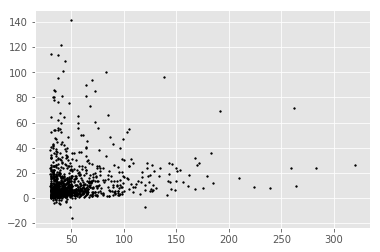

In [8]:
# Getting the values and plotting it
f1 = top1000['count_review'].values
f2 = top1000['sum_helped'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=3)

In [9]:
# euclid1ean distance
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [10]:
k = 3
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(top1000['count_review'])-20, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(top1000['sum_helped'])-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
cnt = 1
print("Initial Centroids")
print(C)

Initial Centroids
[[219.  48.]
 [111. 102.]
 [100.  89.]]


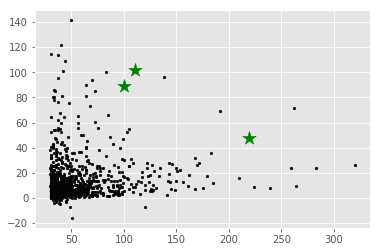

In [11]:
# Plotting along with the Centroids
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

In [12]:
def plot_scatter(cnt):
    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    fig, ax = plt.subplots()
    plt.xlabel('count reviews')
    plt.ylabel('mean sum helped')
    for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
    ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')
    plt.savefig('./saved_cluster/cluster_at_'+str(cnt)+'.png')
    print('save '+'cluster_at_'+str(cnt)+'.png')

save cluster_at_0.png
save cluster_at_1.png
save cluster_at_2.png
save cluster_at_3.png
save cluster_at_4.png
save cluster_at_5.png
save cluster_at_6.png
save cluster_at_7.png
save cluster_at_8.png
save cluster_at_9.png
save cluster_at_10.png
save cluster_at_11.png


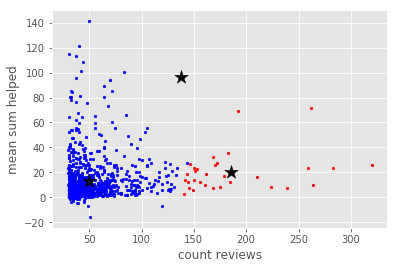

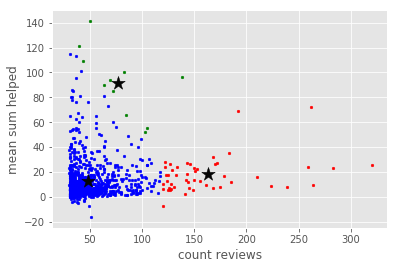

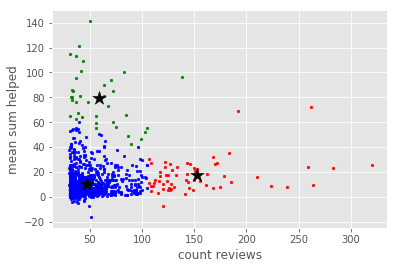

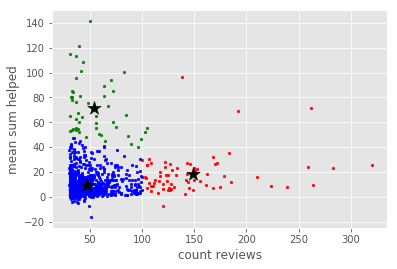

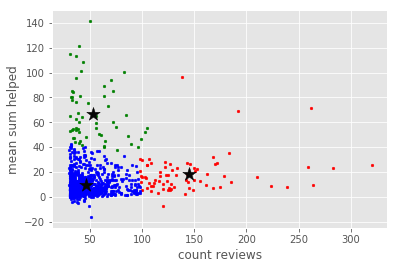

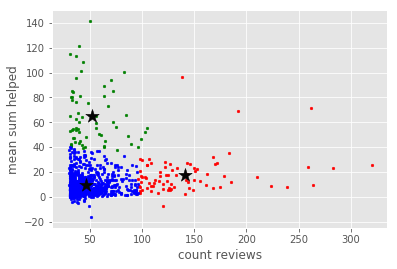

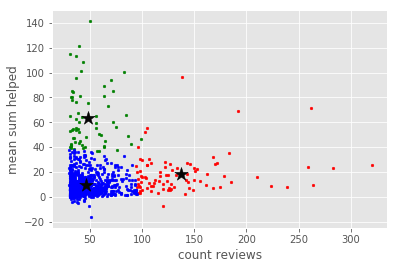

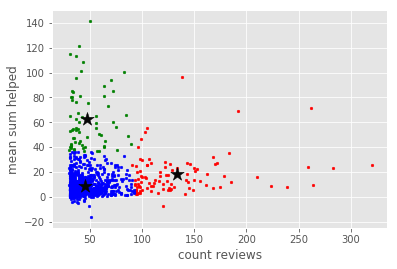

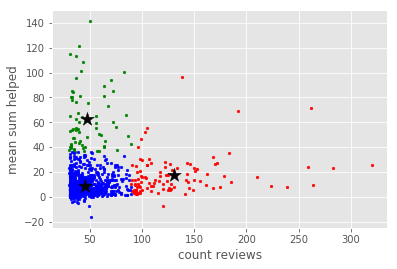

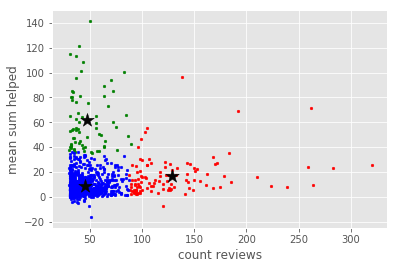

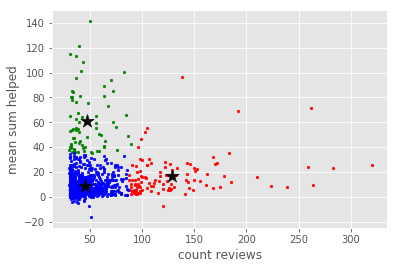

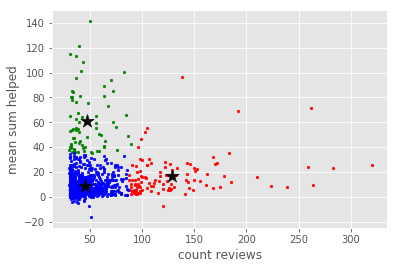

In [13]:
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
clusters = np.zeros(len(X))
error = dist(C, C_old, None)
cnt = 0
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)
    plot_scatter(cnt)
    cnt+=1

In [14]:
from IPython.display import Image
from IPython.display import display
display(Image(url='./saved_cluster/all_clusters.gif'))